# ATAC-STARR Analysis: fastq processing and quality control

## Introduction

The first step of this analysis is to process the raw read fastq files we have acquired from VANTAGE. As part of this process, we will analyze the files for quality using FASTQC, PICARD, and PRESEQ. To perform the trimming, mapping, filtering, and early QC steps, I will execute a python script I wrote and tested. After that, I will use preseq to determine complexity and then plot those results as well as the insert size using ggplot2. Lets get started.

Note: I am switching between R and python kernels here. Bash is executed using the %%bash magic commands via python shell.  

### Python Script

In [2]:
%%bash
#view help to see the behavior of python script 
python3 fastq_processing.py --help

usage: fastq_processing.py [-h] [-a INPUT_R1] [-b INPUT_R2] [-n NAME]
                           [-e BLACKLIST_BED] [-t OUTPUT_TRIMMED]
                           [-o OUTPUT_BAM] [-r OUTPUT_QC] [-g GENOME]

process ATAC-STARR fastq files

required arguments:
  -a INPUT_R1, --input_R1 INPUT_R1
                        raw fastq paired-end read 1 file
  -b INPUT_R2, --input_R2 INPUT_R2
                        raw fastq paired-end read 2 file
  -n NAME, --name NAME  basename to assign to sample
  -t OUTPUT_TRIMMED, --output_trimmed OUTPUT_TRIMMED
                        directory to deposit trimmed reads
  -o OUTPUT_BAM, --output_bam OUTPUT_BAM
                        directory to deposit mapped reads
  -r OUTPUT_QC, --output_qc OUTPUT_QC
                        directory to deposit QC and readcount files
  -g GENOME, --genome GENOME
                        bowtie index of genome to map to

optional arguments:
  -h, --help            show this help message and exit
  -e BLACKLIST_BED, --bl

## Process FASTQ

In [ ]:
%%bash
#sumbit jobs to accre to process fastq files.
sbatch fastq_processing_example.slrm #open this script (in this directory) to see the code that was submitted. 

## Check FASTQC, flagstat readcounts, and trimming reports 

No code was required here. I performed a manual check of the FASTQC files and made an excel spreadsheet of trimming rate and readcounts. These metrics are really important to check so this step should not be skipped. 

## Generate complexity curves

Use preseq lc-extrap to optain results to then plot with ggplot2.

### Get results

In [4]:
%%bash
QC_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/library_complexity'
BAM_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates'

ml GCC/8.2.0 GSL/2.5 #preseq requires GSL, which we load through accre. See preseq documentation for further details. 

In [3]:
%%bash

#execute lc-extrap function from preseq package. Here is an example for one of our samples.
preseq lc_extrap -pe -verbose -o ${QC_DIR}/lc-extrap/GM12878inGM12878_DNA_Rep3_lc-extrap-results.txt \
    -bam ${BAM_DIR}/GM12878inGM12878_DNA_Rep3.filtered.pos-sorted.bam

PAIRED_END_BAM_INPUT
Processed 1000000 records
Processed 2000000 records
Processed 3000000 records
Processed 4000000 records
Processed 5000000 records
Processed 6000000 records
Processed 7000000 records
Processed 8000000 records
Processed 9000000 records
Processed 10000000 records
Processed 11000000 records
Processed 12000000 records
Processed 13000000 records
Processed 14000000 records
Processed 15000000 records
Processed 16000000 records
Processed 17000000 records
Processed 18000000 records
Processed 19000000 records
Processed 20000000 records
Processed 21000000 records
Processed 22000000 records
Processed 23000000 records
Processed 24000000 records
Processed 25000000 records
Processed 26000000 records
Processed 27000000 records
Processed 28000000 records
Processed 29000000 records
Processed 30000000 records
Processed 31000000 records
Processed 32000000 records
Processed 33000000 records
Processed 34000000 records
Processed 35000000 records
Processed 36000000 records
Processed 370000

### Plot complexity curves

Kernel switched to R. 

In [ ]:
#load R packages
library(tidyverse)
library(ggsci)

In [3]:
#make function for reading in the lc-extrap results files. 
read_lcExtrap <- function(input_file, condition, library_type){
  #This function reads in the lcextrap txt file and assigns descriptors of the data to new columns for use in plotting. 
  #condition example is "GM12878inGM12878", library_type example is "DNA_Rep1"
  return(read_tsv(input_file) %>% mutate(condition=condition, Type=library_type))
}


── Column specification ────────────────────────────────────────────────────────
cols(
  TOTAL_READS = col_double(),
  EXPECTED_DISTINCT = col_double(),
  LOWER_0.95CI = col_double(),
  UPPER_0.95CI = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  TOTAL_READS = col_double(),
  EXPECTED_DISTINCT = col_double(),
  LOWER_0.95CI = col_double(),
  UPPER_0.95CI = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  TOTAL_READS = col_double(),
  EXPECTED_DISTINCT = col_double(),
  LOWER_0.95CI = col_double(),
  UPPER_0.95CI = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  TOTAL_READS = col_double(),
  EXPECTED_DISTINCT = col_double(),
  LOWER_0.95CI = col_double(),
  UPPER_0.95CI = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  TOTAL_READS = col_double(),
  EXPE

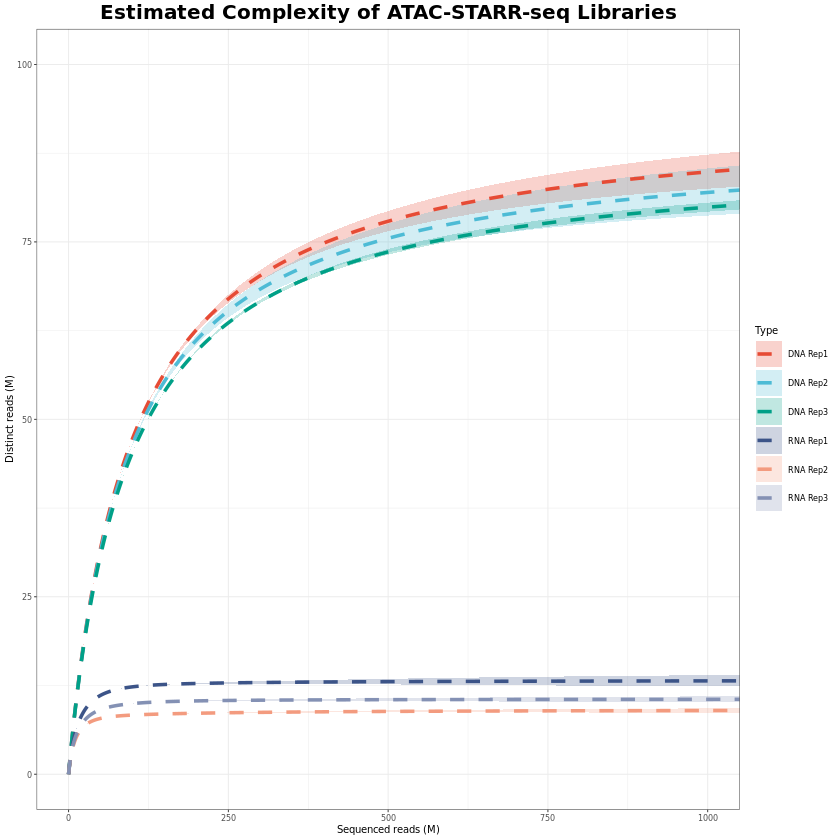

In [8]:
#apply function to read in results and assign to unique data.frame objects. 
setwd("/data/hodges_lab/ATAC-STARR_B-cells/results/library_complexity")
GGD1 <- read_lcExtrap(input_file = 'lc-extrap/GM12878inGM12878_DNA_Rep1_lc-extrap-results.txt', 
                      condition = "GM12878inGM12878", library_type = "DNA Rep1")
GGD2 <- read_lcExtrap(input_file = 'lc-extrap/GM12878inGM12878_DNA_Rep2_lc-extrap-results.txt', 
                      condition = "GM12878inGM12878", library_type = "DNA Rep2")
GGD3 <- read_lcExtrap(input_file = 'lc-extrap/GM12878inGM12878_DNA_Rep3_lc-extrap-results.txt', 
                      condition = "GM12878inGM12878", library_type = "DNA Rep3")
GGR1 <- read_lcExtrap(input_file = 'lc-extrap/GM12878inGM12878_RNA_Rep1_lc-extrap-results.txt', 
                      condition = "GM12878inGM12878", library_type = "RNA Rep1")
GGR2 <- read_lcExtrap(input_file = 'lc-extrap/GM12878inGM12878_RNA_Rep2_lc-extrap-results.txt', 
                      condition = "GM12878inGM12878", library_type = "RNA Rep2")
GGR3 <- read_lcExtrap(input_file = 'lc-extrap/GM12878inGM12878_RNA_Rep3_lc-extrap-results.txt', 
                      condition = "GM12878inGM12878", library_type = "RNA Rep3")

#Merge into one dataframe. 
lcExtrap_all <- bind_rows(GGD1, GGD2, GGD3, GGR1, GGR2, GGR3)

#Plot:
lcExtrap_plot <- ggplot(lcExtrap_all) + 
  geom_ribbon(aes(x=TOTAL_READS/10^6, ymin=LOWER_0.95CI/10^6, ymax=UPPER_0.95CI/10^6, fill=Type)) +
  geom_line(aes(x=TOTAL_READS/10^6, y=EXPECTED_DISTINCT/10^6, colour=Type), size=1, linetype="dashed") +
  xlab("Sequenced reads (M)") + 
  ylab("Distinct reads (M)") +
  ggtitle("Estimated Complexity of ATAC-STARR-seq Libraries") +
  theme_bw(base_size = 6, base_family = "Arial") +
  theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold")) +
  coord_cartesian(xlim = c(0, 1000), ylim = c(0,100)) +
  scale_color_npg() +
  scale_fill_npg(alpha = 0.25)

lcExtrap_plot

In [9]:
#save plot
ggsave(filename = "/data/hodges_lab/ATAC-STARR_B-cells/results/library_complexity/GG-AS-samples_complexity-curve.pdf", 
    plot = lcExtrap_plot, units = "in", width = 4, height = 3, device = cairo_pdf)

## Plot insert size distributions

I use the collectInsertSizeMetrics function from the picard package to get insert size ditributions and then plot these with ggplot2. 

### Get Results

In [2]:
%%bash
module restore picard # I didn't conda install picard due to convience, but it should be strait forward to do so.

QC_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/library_complexity'
BAM_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates'

#Here is an example for one of our samples.
java -jar $EBROOTPICARD/picard.jar CollectInsertSizeMetrics I=${BAM_DIR}/GM12878inGM12878_DNA_Rep3.filtered.pos-sorted.bam \
    H=${QC_DIR}/picard-CISM/GM12878inGM12878_DNA_Rep3_histogram.pdf \
    O=${QC_DIR}/picard-CISM/GM12878inGM12878_DNA_Rep3_picard-CISM.txt

INFO	2021-11-01 19:55:49	CollectInsertSizeMetrics	

********** NOTE: Picard's command line syntax is changing.
**********
********** For more information, please see:
********** https://github.com/broadinstitute/picard/wiki/Command-Line-Syntax-Transition-For-Users-(Pre-Transition)
**********
********** The command line looks like this in the new syntax:
**********
**********    CollectInsertSizeMetrics -I /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_DNA_Rep3.filtered.pos-sorted.bam -H /data/hodges_lab/ATAC-STARR_B-cells/results/library_complexity/picard-CISM/GM12878inGM12878_DNA_Rep3_histogram.pdf -O /data/hodges_lab/ATAC-STARR_B-cells/results/library_complexity/picard-CISM/GM12878inGM12878_DNA_Rep3_picard-CISM.txt
**********


19:55:49.972 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/cvmfs/oasis.opensciencegrid.org/accre/mirror/common/easybuild/software/picard/2.18.27/picard.jar!/com/intel/gkl/native/libgkl

INFO	2021-11-01 19:57:10	SinglePassSamProgram	Processed    36,000,000 records.  Elapsed time: 00:01:20s.  Time for last 1,000,000:    2s.  Last read position: chr17:68,291,410
INFO	2021-11-01 19:57:12	SinglePassSamProgram	Processed    37,000,000 records.  Elapsed time: 00:01:22s.  Time for last 1,000,000:    2s.  Last read position: chr17:82,598,997
INFO	2021-11-01 19:57:14	SinglePassSamProgram	Processed    38,000,000 records.  Elapsed time: 00:01:24s.  Time for last 1,000,000:    2s.  Last read position: chr18:48,875,563
INFO	2021-11-01 19:57:17	SinglePassSamProgram	Processed    39,000,000 records.  Elapsed time: 00:01:27s.  Time for last 1,000,000:    2s.  Last read position: chr19:2,051,319
INFO	2021-11-01 19:57:19	SinglePassSamProgram	Processed    40,000,000 records.  Elapsed time: 00:01:29s.  Time for last 1,000,000:    2s.  Last read position: chr19:10,568,959
INFO	2021-11-01 19:57:21	SinglePassSamProgram	Processed    41,000,000 records.  Elapsed time: 00:01:31s.  Time for last 1

INFO	2021-11-01 19:58:59	SinglePassSamProgram	Processed    83,000,000 records.  Elapsed time: 00:03:09s.  Time for last 1,000,000:    2s.  Last read position: chr9:37,329,703
INFO	2021-11-01 19:59:01	SinglePassSamProgram	Processed    84,000,000 records.  Elapsed time: 00:03:11s.  Time for last 1,000,000:    2s.  Last read position: chr9:99,820,041
INFO	2021-11-01 19:59:03	SinglePassSamProgram	Processed    85,000,000 records.  Elapsed time: 00:03:13s.  Time for last 1,000,000:    2s.  Last read position: chr9:128,340,532
INFO	2021-11-01 19:59:05	SinglePassSamProgram	Processed    86,000,000 records.  Elapsed time: 00:03:15s.  Time for last 1,000,000:    1s.  Last read position: chrX:12,951,039
INFO	2021-11-01 19:59:07	SinglePassSamProgram	Processed    87,000,000 records.  Elapsed time: 00:03:17s.  Time for last 1,000,000:    1s.  Last read position: chrX:70,434,483
INFO	2021-11-01 19:59:09	SinglePassSamProgram	Processed    88,000,000 records.  Elapsed time: 00:03:19s.  Time for last 1,00

### Plot insert size distribution

Kernel switched to R.

In [10]:
#load R packages
library(tidyverse)
library(ggsci)

In [11]:
#make function for reading in the picard ISM results files. 
read_ISM <- function(input_file, condition, library_type){
  #This function reads in the lcextrap txt file and assigns descriptors of the data to new columns for use in plotting. 
  #condition example is "GM12878inGM12878", library_type example is "DNA_Rep1"
  tsv <- read_tsv(input_file, skip = 12, col_names = FALSE) %>% mutate(condition=condition, Type=library_type)
  return(mutate(tsv, cpm=(X2/sum(tsv$X2))*1e6))
}


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  X2 = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  X2 = col_double()
)




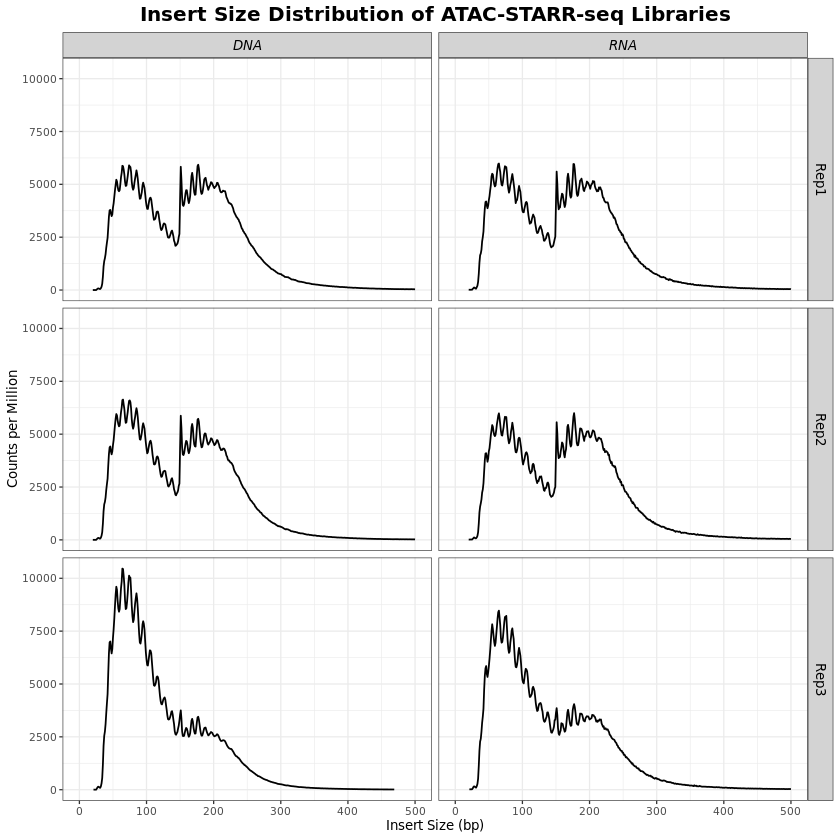

In [12]:
#Read in results and assign to unique data.frame objects. 
setwd("/data/hodges_lab/ATAC-STARR_B-cells/results/library_complexity/")
GGD1 <- read_ISM(input_file = 'picard-CISM/GM12878inGM12878_DNA_Rep1_picard-CISM.txt', 
                 condition = "DNA", library_type = "Rep1")
GGD2 <- read_ISM(input_file = 'picard-CISM/GM12878inGM12878_DNA_Rep2_picard-CISM.txt', 
                 condition = "DNA", library_type = "Rep2")
GGD3 <- read_ISM(input_file = 'picard-CISM/GM12878inGM12878_DNA_Rep3_picard-CISM.txt', 
                 condition = "DNA", library_type = "Rep3")
GGR1 <- read_ISM(input_file = 'picard-CISM/GM12878inGM12878_RNA_Rep1_picard-CISM.txt', 
                 condition = "RNA", library_type = "Rep1")
GGR2 <- read_ISM(input_file = 'picard-CISM/GM12878inGM12878_RNA_Rep2_picard-CISM.txt', 
                 condition = "RNA", library_type = "Rep2")
GGR3 <- read_ISM(input_file = 'picard-CISM/GM12878inGM12878_RNA_Rep3_picard-CISM.txt', 
                 condition = "RNA", library_type = "Rep3")

#Merge into one dataframe. 
ISM_all <- bind_rows(GGD1, GGD2, GGD3, GGR1, GGR2, GGR3)

#Plot:
ISM_plot <- ggplot(ISM_all, aes(x=X1, y=cpm)) +
  geom_line(size = 0.5) +
  facet_grid(rows = vars(Type), cols = vars(condition)) +
  coord_cartesian(x=c(0,500)) +
  scale_x_continuous(breaks = seq(0, 500, by = 100)) +
  scale_color_manual(values = c("black", "black", "black", "black", "black", "black")) +
  xlab("Insert Size (bp)") + 
  ylab("Counts per Million") +
  ggtitle("Insert Size Distribution of ATAC-STARR-seq Libraries") +
  theme_bw(base_size = 8, base_family = "Arial") +
  theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold"), 
        strip.text.x = element_text(size = 8, family = "Arial", face = "italic", color = "black"),
        strip.text.y = element_text(size = 8, family = "Arial", face = "plain", color = "black"),
        strip.background = element_rect(fill = "lightgray"), 
        legend.position = "none")

ISM_plot

In [17]:
ggsave(filename = "/data/hodges_lab/ATAC-STARR_B-cells/results/library_complexity/InsertSizeMetrics_gg-samples.pdf", 
    plot = ISM_plot, units = "in", width = 4, height = 3, device = cairo_pdf)